## Importing necessary library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the data and making a copy

In [2]:
#Taking a copy so that the original dataset is not affected
df = pd.read_csv("I://SSSK//Data Science-D55//Project - GUVI//Final project//Car_price//cars_price(copy).csv")
raw_data = df.copy()

In [3]:
#Many of the observations are filled with the symbol "?". We can replace it with blanks.
raw_data.replace("?","NaN",inplace=True)
raw_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
#Checking the statistics of each column to identify any data types other than integers or floats. Please note regression models can only be constructed with numerical (int or float) values.
raw_data.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,NaN
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [5]:
#checking data types of each column
raw_data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Handling null values

In [6]:
#Prior to commencing the data type conversion process, it is imperative to verify the absence of any null values within the dataset.

In [7]:
# .isna() method is not picking up the NaN values. Hence I have used .isin(["NaN"]) method
raw_data.isin(["NaN"])

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Finding the number of null values present in the dataset.
raw_data.isin(["NaN"]).sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## Dropping missing values

In [9]:
# The target variable in this dataset is 'Price,' and there are four observations with missing values. It is safe to remove these entire rows since they do not contribute to the prediction.
# Originally, the dataset comprised 206 rows. Following the removal of rows with null values, there are now 193 rows. This removal is deemed acceptable as long as it remains below 6% of the total data.
# raw_data = raw_data[~(raw_data[column_to_check] == 'specific_text_to_remove','specific_text_to_remove')]
#raw_data_NO_mv = raw_data.dropna(axis=0) - Not worked


raw_data = raw_data[~(raw_data["num-of-doors"] == 'NaN')]
raw_data = raw_data[~(raw_data["bore"] == 'NaN')]
raw_data = raw_data[~(raw_data["stroke"] == 'NaN')]
raw_data = raw_data[~(raw_data["horsepower"] == 'NaN')]
raw_data = raw_data[~(raw_data["peak-rpm"] == 'NaN')]
raw_data = raw_data[~(raw_data["price"] == 'NaN')]
raw_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [10]:
raw_data.isin(["NaN"]).sum()

symboling             0
normalized-losses    34
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [11]:
#Dropping the column 'normalized-losses' which does not have close to 20% of the data. 
data_no_mv = raw_data.drop("normalized-losses", axis=1)
data_no_mv.describe(include="all")

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,193,193,193,193,193,193,193,193.000000,193.000000,...,193.000000,193,193,193,193.000000,193,193,193.000000,193.000000,193
unique,NaN,21,2,2,2,5,3,2,NaN,NaN,...,NaN,7,38,36,NaN,56,21,NaN,NaN,178
top,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,4800,NaN,NaN,8921
freq,NaN,32,174,158,112,92,114,190,NaN,NaN,...,NaN,88,23,19,NaN,19,36,NaN,NaN,2
mean,0.797927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.923834,174.326425,...,128.124352,NaN,NaN,NaN,10.143627,NaN,NaN,25.326425,30.787565,NaN
std,1.235582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.152409,12.478593,...,41.590452,NaN,NaN,NaN,3.977491,NaN,NaN,6.387828,6.816910,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,...,98.000000,NaN,NaN,NaN,8.500000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,25.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,184.600000,...,146.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [12]:
# Now we have do not have any blank data. the dataset is ready for preprocessing.
data_no_mv.isin(["NaN"]).sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Handling inconsistent data types

In [13]:
#Checking the data types of the all the variables
data_no_mv.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Explaining the complex features

Symboling:

Symboling is a measure of the risk associated with the car. It's often used as a representation of the car's insurance risk rating. A higher symboling value indicates a higher risk.

Normalized-losses:

This feature represents the relative average loss payment per insured vehicle year. The values are normalized, meaning they are represented on a scale from 0 to 1. A higher normalized-losses value may indicate a higher likelihood of insurance losses.

Aspiration:

Aspiration refers to the type of air intake system the car's engine has. It can be either "std" (standard) or "turbo" (turbocharged). Turbocharged engines generally provide more power.

Bore:

Bore is the diameter of each cylinder in the engine. It is one of the parameters that determine the engine's displacement and, consequently, its performance characteristics.

Stroke:

Stroke is the distance the piston travels inside the cylinder. Together with the bore, it helps determine the engine's displacement and overall performance.

Compression-ratio:

The compression ratio is a measure of how much the air-fuel mixture is compressed inside the engine's cylinders before ignition. It is an important factor influencing engine efficiency and performance. Higher compression ratios often lead to more powerful engines.

### Building upon the preceding explanation, I've introduced a new column containing the actual data type details for each variable. This analysis was conducted using Excel.

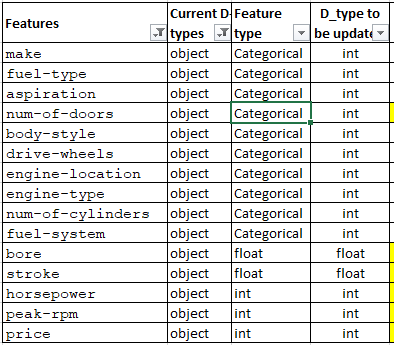

#### Since we have multiple categorial variables, we to first assign dummies before we start changing the data types

## Assigining Dummy variables

In [14]:
data_with_dummies = data_no_mv.copy()

In [15]:
# Setting the default display columns to all, as we need to know the data types of each variables
pd.set_option('display.max_columns', None)
data_with_dummies

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [16]:
data_with_dummies.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [17]:
# We are selecting only the variables with object as their datatypes
car_df_objects = data_with_dummies.select_dtypes(include=['object']).copy()

In [18]:
car_df_objects.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price'],
      dtype='object')

In [19]:
# Creating a new list with the selected features

dummy_labels = ['make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system']

In [20]:
# Creating a new dataframe with the selected features
df_new = car_df_objects[dummy_labels]

In [21]:
df_new.head() 

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [22]:
#Utilizing sklearn.preprocessing.LabelEncoder, we are assigning dummy values to each variable. This process involves the deployment of a 'for-loop'.
# The process will generate a new column containing the dummy values corresponding to their respective source columns.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df_new.columns:
    if df_new[column].dtype == 'object':  # Apply label encoding only to object (string) columns
        df_new[column + '_encoded'] = label_encoder.fit_transform(df_new[column])

<ipython-input-22-94771da16059>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[column + '_encoded'] = label_encoder.fit_transform(df_new[column])


In [23]:
#Displaying the dataset to confirm the successful assignment of dummy values for each variable, ensuring their presence in the respective new columns
df_new

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,make_encoded,fuel-type_encoded,aspiration_encoded,num-of-doors_encoded,body-style_encoded,drive-wheels_encoded,engine-location_encoded,engine-type_encoded,num-of-cylinders_encoded,fuel-system_encoded
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,0,1,0,1,0,2,0,0,2,4
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,0,1,0,1,0,2,0,0,2,4
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,0,1,0,1,2,2,0,4,3,4
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,1,1,0,0,3,1,0,2,2,4
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,1,1,0,0,3,0,0,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,20,1,0,0,3,2,0,2,2,4
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,20,1,1,0,3,2,0,2,2,4
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,20,1,0,0,3,2,0,4,3,4
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,20,0,1,0,3,2,0,2,3,2


In [24]:
df_new.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'make_encoded', 'fuel-type_encoded',
       'aspiration_encoded', 'num-of-doors_encoded', 'body-style_encoded',
       'drive-wheels_encoded', 'engine-location_encoded',
       'engine-type_encoded', 'num-of-cylinders_encoded',
       'fuel-system_encoded'],
      dtype='object')

In [25]:
# Choosing only the labeled columns from the 'df_new' dataset to be appended to the 'data_with_dummies' dataset.

new_columns_to_added = ['make_encoded', 'fuel-type_encoded',
       'aspiration_encoded', 'num-of-doors_encoded', 'body-style_encoded',
       'drive-wheels_encoded', 'engine-location_encoded',
       'engine-type_encoded', 'num-of-cylinders_encoded',
       'fuel-system_encoded']

In [26]:
data_with_dummies[new_columns_to_added] = df_new[new_columns_to_added]

In [27]:
# Now the dataset contains the columns with dummy variables
data_with_dummies

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_encoded,fuel-type_encoded,aspiration_encoded,num-of-doors_encoded,body-style_encoded,drive-wheels_encoded,engine-location_encoded,engine-type_encoded,num-of-cylinders_encoded,fuel-system_encoded
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,0,1,0,1,0,2,0,0,2,4
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,0,1,0,1,0,2,0,0,2,4
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,0,1,0,1,2,2,0,4,3,4
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,1,1,0,0,3,1,0,2,2,4
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,1,1,0,0,3,0,0,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,20,1,0,0,3,2,0,2,2,4
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,20,1,1,0,3,2,0,2,2,4
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,20,1,0,0,3,2,0,4,3,4
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470,20,0,1,0,3,2,0,2,3,2


In [28]:
data_with_dummies.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'make_encoded', 'fuel-type_encoded', 'aspiration_encoded',
       'num-of-doors_encoded', 'body-style_encoded', 'drive-wheels_encoded',
       'engine-location_encoded', 'engine-type_encoded',
       'num-of-cylinders_encoded', 'fuel-system_encoded'],
      dtype='object')

In [29]:
#As we have labeled columns with dummy variables, the inclusion of their corresponding source columns is redundant for the regression model. Consequently, we can remove those columns.

columns_to_remove = ['make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
        'fuel-system']
data_with_dummies = data_with_dummies.drop(columns=columns_to_remove)

In [30]:
# Displaying the dataset to confirm the presence of only the labelled columns excluding their respective source columns
data_with_dummies

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_encoded,fuel-type_encoded,aspiration_encoded,num-of-doors_encoded,body-style_encoded,drive-wheels_encoded,engine-location_encoded,engine-type_encoded,num-of-cylinders_encoded,fuel-system_encoded
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495,0,1,0,1,0,2,0,0,2,4
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500,0,1,0,1,0,2,0,0,2,4
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500,0,1,0,1,2,2,0,4,3,4
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950,1,1,0,0,3,1,0,2,2,4
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450,1,1,0,0,3,0,0,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845,20,1,0,0,3,2,0,2,2,4
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045,20,1,1,0,3,2,0,2,2,4
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485,20,1,0,0,3,2,0,4,3,4
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.4,23.0,106,4800,26,27,22470,20,0,1,0,3,2,0,2,3,2


## Reordering the columns to ensure that it matches with the original dataset

In [31]:
data_with_dummies.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'make_encoded',
       'fuel-type_encoded', 'aspiration_encoded', 'num-of-doors_encoded',
       'body-style_encoded', 'drive-wheels_encoded', 'engine-location_encoded',
       'engine-type_encoded', 'num-of-cylinders_encoded',
       'fuel-system_encoded'],
      dtype='object')

In [32]:
reorder_columns = ['symboling', 'make_encoded', 'fuel-type_encoded', 'aspiration_encoded', 'num-of-doors_encoded', 
                   'body-style_encoded', 'drive-wheels_encoded', 'engine-location_encoded','wheel-base', 'length', 
                   'width', 'height', 'curb-weight', 'engine-type_encoded', 'num-of-cylinders_encoded', 
                   'engine-size', 'fuel-system_encoded', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
                   'peak-rpm', 'city-mpg', 'highway-mpg', 'price', ]

In [33]:
data_w_dum_reordered = data_with_dummies[reorder_columns]

In [34]:
# Displaying the dataset to correct order of the columns
data_w_dum_reordered.head()

,symboling,make_encoded,fuel-type_encoded,aspiration_encoded,num-of-doors_encoded,body-style_encoded,drive-wheels_encoded,engine-location_encoded,wheel-base,length,width,height,curb-weight,engine-type_encoded,num-of-cylinders_encoded,engine-size,fuel-system_encoded,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,4,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,4,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,4,2.68,3.47,9.0,154,5000,19,26,16500
3,2,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,4,3.19,3.4,10.0,102,5500,24,30,13950
4,2,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,4,3.19,3.4,8.0,115,5500,18,22,17450


### Now we can continue with the process of resolving the inconsistencies in the data types of the variables. As mentioned earlier, regression models can only handle variables with integer or float data types.

In [35]:
#Checking the datatypes of all variables
data_w_dum_reordered.dtypes

symboling                     int64
make_encoded                  int32
fuel-type_encoded             int32
aspiration_encoded            int32
num-of-doors_encoded          int32
body-style_encoded            int32
drive-wheels_encoded          int32
engine-location_encoded       int32
wheel-base                  float64
length                      float64
width                       float64
height                      float64
curb-weight                   int64
engine-type_encoded           int32
num-of-cylinders_encoded      int32
engine-size                   int64
fuel-system_encoded           int32
bore                         object
stroke                       object
compression-ratio           float64
horsepower                   object
peak-rpm                     object
city-mpg                      int64
highway-mpg                   int64
price                        object
dtype: object

# The following 5 features currently have an 'object' data type and should be updated to their respective data types as mentioned below:
# bore
# stroke
# horsepower
# peak-rpm
# price
#df['Column1'] = df['Column1'].astype(float)
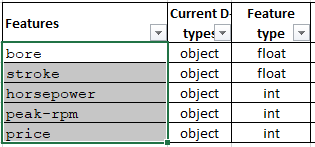

In [36]:
# Standardizing all five data types to float for the regression model as the regression model will consdier all the values as float. This is the reason we are seeing the results in float.

columns_to_convert = ["bore", "stroke", "horsepower","peak-rpm","price"]

for column in columns_to_convert:
    data_w_dum_reordered[column] = data_w_dum_reordered[column].astype(float)
    print(f"{column}: {data_w_dum_reordered[column].dtypes}")

bore: float64
stroke: float64
horsepower: float64
peak-rpm: float64
price: float64


In [37]:
# Verfying the datatypes
data_cleaned = data_w_dum_reordered.copy()
data_cleaned.dtypes

symboling                     int64
make_encoded                  int32
fuel-type_encoded             int32
aspiration_encoded            int32
num-of-doors_encoded          int32
body-style_encoded            int32
drive-wheels_encoded          int32
engine-location_encoded       int32
wheel-base                  float64
length                      float64
width                       float64
height                      float64
curb-weight                   int64
engine-type_encoded           int32
num-of-cylinders_encoded      int32
engine-size                   int64
fuel-system_encoded           int32
bore                        float64
stroke                      float64
compression-ratio           float64
horsepower                  float64
peak-rpm                    float64
city-mpg                      int64
highway-mpg                   int64
price                       float64
dtype: object

#### All the datatypes have been standardised

#### Now we have cleaned the dataset which is ready to be analysed for prediction modeling

In [38]:
#Utilizing the 'describe' function to examine the statistics of each variable, ensuring that the dataset comprises 193 observations without any missing values
data_cleaned.describe()

,symboling,make_encoded,fuel-type_encoded,aspiration_encoded,num-of-doors_encoded,body-style_encoded,drive-wheels_encoded,engine-location_encoded,wheel-base,length,width,height,curb-weight,engine-type_encoded,num-of-cylinders_encoded,engine-size,fuel-system_encoded,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,12.036269,0.901554,0.181347,0.419689,2.621762,1.326425,0.015544,98.923834,174.326425,65.893782,53.869948,2561.507772,2.025907,2.056995,128.124352,2.632124,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,5.904071,0.298691,0.386308,0.494792,0.870191,0.551679,0.124025,6.152409,12.478593,2.137795,2.394770,526.700026,0.812886,0.569965,41.590452,1.582589,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,0.000000,0.000000,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,8.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,2.000000,2.000000,98.000000,1.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,12.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,2.000000,2.000000,120.000000,4.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,18.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,2.000000,2.000000,146.000000,4.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,3.000000,20.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,4.000000,5.000000,326.000000,6.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


### Finding the significant feature using OLS method

In [39]:
data_cleaned.columns

Index(['symboling', 'make_encoded', 'fuel-type_encoded', 'aspiration_encoded',
       'num-of-doors_encoded', 'body-style_encoded', 'drive-wheels_encoded',
       'engine-location_encoded', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type_encoded', 'num-of-cylinders_encoded',
       'engine-size', 'fuel-system_encoded', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [40]:
x1 = data_cleaned[['symboling', 'make_encoded', 'fuel-type_encoded', 'aspiration_encoded',
       'num-of-doors_encoded', 'body-style_encoded', 'drive-wheels_encoded',
       'engine-location_encoded', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type_encoded', 'num-of-cylinders_encoded',
       'engine-size', 'fuel-system_encoded', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg',]]
y = data_cleaned["price"]

In [41]:
# Fitting all the features to know its respective p-values. P-values will reveal the signficance of the feature. 
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     68.80
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           3.38e-74
Time:                        11:53:31   Log-Likelihood:                -1780.1
No. Observations:                 193   AIC:                             3610.
Df Residuals:                     168   BIC:                             3692.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -5.255e+04   1.77e+04     -2.977      0.003   -8.74e+04   -1.77e+04
symboling                 -302.8575    268.445     -1.128      0.261    -832.818     227.103
make_encoded              -208.8592     39.534     -5.283      0.000    -286.907    -130.811
fuel-type_encoded         2547.6448   6407.694      0.398      0.691   -1.01e+04    1.52e+04
aspiration_encoded        1630.6680    991.247      1.645      0.102    -326.238    3587.574
num-of-doors_encoded      -438.0458    654.211     -0.670      0.504   -1729.580     853.488
body-style_encoded        -633.1551    378.008     -1.675      0.096   -1379.413     113.103
drive-wheels_encoded       600.8767    569.920      1.054      0.293    -524.251    1726.004
engine-location_encoded   1.196e+04   2110.874      5.665      0.000    7790.608    1.61e+04
wheel-base                  -4.5608    109.810     -0.042      0.967    -221.346     212.224
length                     -12.5807     54.776     -0.230      0.819    -120.719      95.558
width                      497.7952    264.232      1.884      0.061     -23.849    1019.439
height                     366.2109    137.599      2.661      0.009      94.565     637.857
curb-weight                  2.1949      1.585      1.384      0.168      -0.935       5.325
engine-type_encoded       -537.6236    327.078     -1.644      0.102   -1183.337     108.090
num-of-cylinders_encoded -1241.6438    510.118     -2.434      0.016   -2248.712    -234.576
engine-size                129.7964     21.235      6.112      0.000      87.874     171.719
fuel-system_encoded        295.2605    205.176      1.439      0.152    -109.795     700.316
bore                     -1505.3182   1104.348     -1.363      0.175   -3685.505     674.868
stroke                   -3608.2872    777.144     -4.643      0.000   -5142.513   -2074.061
compression-ratio          260.9826    461.222      0.566      0.572    -649.556    1171.521
horsepower                  14.9693     24.974      0.599      0.550     -34.333      64.272
peak-rpm                     1.2385      0.673      1.840      0.068      -0.091       2.568
city-mpg                  -157.4362    167.665     -0.939      0.349    -488.438     173.566
highway-mpg                253.4141    150.224      1.687      0.093     -43.157     549.985
==============================================================================
Omnibus:                       58.651   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.395
Skew:                           1.031   Prob(JB):                     3.57e-66
Kurtosis:                       8.765   Cond. No.                     5.42e+05
==============================================================================

Note

#### Results summary: I am removing all the features which has the P-value of more than 0.1,

In [42]:
# I am retaining the feature which has the p-value less than 0.1, which the indicates the significance of the feature.
# though fuel-system_encoded had 0.102 p-value I am retaining the feature as removing it is giving the r-squared value of 0.897

x1 = data_cleaned[['make_encoded', 'aspiration_encoded', 'body-style_encoded', 
                   'drive-wheels_encoded', 'engine-location_encoded', 'width', 'height', 
                   'engine-size',  'fuel-system_encoded', 'peak-rpm', 'stroke', 'highway-mpg']]
y = data_cleaned["price"]

In [43]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     133.1
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.09e-82
Time:                        11:53:31   Log-Likelihood:                -1789.1
No. Observations:                 193   AIC:                             3604.
Df Residuals:                     180   BIC:                             3647.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -8.649e+04    1.2e+04     -7.215      0.000    -1.1e+05   -6.28e+04
make_encoded             -217.1053     36.640     -5.925      0.000    -289.404    -144.807
aspiration_encoded       2002.4941    592.403      3.380      0.001     833.546    3171.443
body-style_encoded       -502.1828    284.716     -1.764      0.079   -1063.993      59.628
drive-wheels_encoded     1021.5147    445.231      2.294      0.023     142.970    1900.059
engine-location_encoded   1.19e+04   1841.716      6.464      0.000    8270.402    1.55e+04
width                     841.9655    171.240      4.917      0.000     504.069    1179.862
height                    518.6071    112.105      4.626      0.000     297.399     739.815
engine-size               133.7178     10.424     12.828      0.000     113.150     154.286
fuel-system_encoded       304.6541    176.867      1.723      0.087     -44.345     653.654
peak-rpm                    1.3829      0.517      2.675      0.008       0.363       2.403
stroke                  -2994.8975    692.875     -4.322      0.000   -4362.099   -1627.696
highway-mpg               101.4275     56.888      1.783      0.076     -10.827     213.682
==============================================================================
Omnibus:                       35.994   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.388
Skew:                           0.649   Prob(JB):                     6.58e-30
Kurtosis:                       6.876   Cond. No.                     3.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### FINDINGS: The 'R2' has a very negligible reduction. With regards to 'Adjusted R2' the value does not change. Hence the model explains 90% of the variability of the target variable.

# Linear regression using SK learn


# Train_Test split. 

#We are using SKlearn to split the data into training (80%) and testing (20%) sets.

#### We are using the significant columns identified through the OLS method to perform an 80-20 split of the data.

In [44]:
data_optimized = data_cleaned[['make_encoded', 'aspiration_encoded', 'body-style_encoded', 
                   'drive-wheels_encoded', 'engine-location_encoded', 'width', 'height', 
                   'engine-size',  'fuel-system_encoded', 'stroke', 'peak-rpm', 'highway-mpg', 'price']]

In [45]:
data_optimized.head()

,make_encoded,aspiration_encoded,body-style_encoded,drive-wheels_encoded,engine-location_encoded,width,height,engine-size,fuel-system_encoded,stroke,peak-rpm,highway-mpg,price
0,0,0,0,2,0,64.1,48.8,130,4,2.68,5000.0,27,13495.0
1,0,0,0,2,0,64.1,48.8,130,4,2.68,5000.0,27,16500.0
2,0,0,2,2,0,65.5,52.4,152,4,3.47,5000.0,26,16500.0
3,1,0,3,1,0,66.2,54.3,109,4,3.40,5500.0,30,13950.0
4,1,0,3,0,0,66.4,54.3,136,4,3.40,5500.0,22,17450.0


In [46]:
data_optimized.describe()

,make_encoded,aspiration_encoded,body-style_encoded,drive-wheels_encoded,engine-location_encoded,width,height,engine-size,fuel-system_encoded,stroke,peak-rpm,highway-mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,12.036269,0.181347,2.621762,1.326425,0.015544,65.893782,53.869948,128.124352,2.632124,3.248860,5099.740933,30.787565,13285.025907
std,5.904071,0.386308,0.870191,0.551679,0.124025,2.137795,2.394770,41.590452,1.582589,0.315421,468.694369,6.816910,8089.082886
min,0.000000,0.000000,0.000000,0.000000,0.000000,60.300000,47.800000,61.000000,0.000000,2.070000,4150.000000,16.000000,5118.000000
25%,8.000000,0.000000,2.000000,1.000000,0.000000,64.100000,52.000000,98.000000,1.000000,3.110000,4800.000000,25.000000,7738.000000
50%,12.000000,0.000000,3.000000,1.000000,0.000000,65.400000,54.100000,120.000000,4.000000,3.290000,5100.000000,30.000000,10245.000000
75%,18.000000,0.000000,3.000000,2.000000,0.000000,66.900000,55.700000,146.000000,4.000000,3.410000,5500.000000,34.000000,16515.000000
max,20.000000,1.000000,4.000000,2.000000,1.000000,72.000000,59.800000,326.000000,6.000000,4.170000,6600.000000,54.000000,45400.000000


#### Findings: All the variables except engine-size and price is normally distributed. We will first create model with existing data and apply no scaling at this stage

In [47]:
# Taking a copy of the data, so that the dataset with optimized features are not affected
data_final = data_optimized.copy()

In [48]:
# Resetting the index, as the data will have the index of the original dataset
data_final = data_final.reset_index(drop=True)
data_final

,make_encoded,aspiration_encoded,body-style_encoded,drive-wheels_encoded,engine-location_encoded,width,height,engine-size,fuel-system_encoded,stroke,peak-rpm,highway-mpg,price
0,0,0,0,2,0,64.1,48.8,130,4,2.68,5000.0,27,13495.0
1,0,0,0,2,0,64.1,48.8,130,4,2.68,5000.0,27,16500.0
2,0,0,2,2,0,65.5,52.4,152,4,3.47,5000.0,26,16500.0
3,1,0,3,1,0,66.2,54.3,109,4,3.40,5500.0,30,13950.0
4,1,0,3,0,0,66.4,54.3,136,4,3.40,5500.0,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,20,0,3,2,0,68.9,55.5,141,4,3.15,5400.0,28,16845.0
189,20,1,3,2,0,68.8,55.5,141,4,3.15,5300.0,25,19045.0
190,20,0,3,2,0,68.9,55.5,173,4,2.87,5500.0,23,21485.0
191,20,1,3,2,0,68.9,55.5,145,2,3.40,4800.0,27,22470.0


#### Train_Test split of the dataset (data_cinal) (80%-20%)

In [49]:
# Importing train_test_split function from SKlearn

from sklearn.model_selection import train_test_split

# splitting dataset into features and target variables

X = data_final.drop('price', axis=1)
y = data_final["price"]

In [50]:
# Splitting the dataset. Using random state "42" to ensure that the data is split with the same random style
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Importing LinearRegression function from SKlearn
from sklearn.linear_model import LinearRegression

# Assignging varible to regression model
model = LinearRegression()

In [52]:
#Fitting the training data into the moddel
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# predcting the target variable using the model
y_hat = model.predict(X_train)

In [54]:
y_hat

array([ 6569.17809602,  5370.70068022, 10071.82539343, 10030.38791952,
        7143.03511219, 13234.42975535, 16402.71395128, 19214.38554252,
       12584.6517987 , 15643.47933291,  7580.19181905,  6810.3052892 ,
        7753.64647748, 16231.73220702, 11890.04156776,  9887.96765825,
        7348.63558179,  7204.13771466, 14116.61784968, 18264.18783937,
        7533.64107121, 18006.23909689, 22106.97890658, 16402.71395128,
       20774.69293067, 11972.22576409, 12654.26784727,  6569.17809602,
       20774.69293067, 17519.55823457,  6860.2222375 , 15603.48732197,
       19160.78685956,  6887.19217642, 10030.38791952,  9725.31030502,
        9688.35166023, 16470.80331464, 34493.12384604,  7332.20610972,
       18264.18783937, 35062.87615396,  8852.80345406, 20597.49250348,
       16132.89434254, 17469.47528096, 13885.49246345,  7204.13771466,
       15338.03749445,  5572.85446493, 15861.79725966,  5670.46295045,
       14164.58020967, 32667.77562761, 22598.22152284,  5572.85446493,
      

#### R2-score (Model's prediction power on training set)

In [55]:
model.score(X_train, y_train)

0.8997431981534014

#### R2 (Model's prediction power on test set)

In [56]:
model.score(X_test, y_test)

0.888220681644823

##### Defining a function for calculating Adjusted R2

In [57]:
def adj_r2(x,y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

##### Adjusted R2 on the training set

In [58]:
adj_r2(X_train, y_train)

0.8912107043792228

##### Adjusted R2 on the test set

In [59]:
adj_r2(X_test, y_test)

0.8366302270193567

<function matplotlib.pyplot.show(close=None, block=None)>

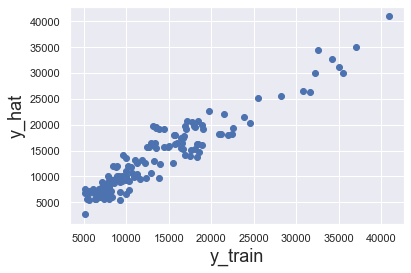

In [60]:
#plotting the y_train and y_hat(predicted_train data) to know the accuracy of the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('y_train', size=18)
plt.ylabel('y_hat', size=18)
plt.show

##### Metrics for the train data

In [61]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, y_hat)
mse = metrics.mean_squared_error(y_train, y_hat)
r2 = metrics.r2_score(y_train, y_hat)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 1791.764409410358
Mean Squared Error (MSE): 5319425.1769151725
R-squared (R2): 0.8997431981534014


In [62]:
y_hat_test = model.predict(X_test)
y_hat_test

array([41317.65759105,  9570.24644303,  9032.43809164,  5796.79155704,
        5511.97711831,  6956.85138492, 26681.71312223,  8026.35605106,
       30179.50613812, 14164.58020967, 11256.65178181,  4508.12291574,
       20131.40568795, 41290.33890145,  9422.55576198,  6669.60924095,
        6343.66143234,  6405.77725714,  5000.69630911,  6405.77725714,
       14116.61784968,  9460.0664231 , 34493.12384604, 15401.45048441,
        6698.60271369, 16500.59302162,  6227.6162121 , 13546.86554175,
       25685.17134959,  4226.69861863, 10175.55355318, 18841.48644117,
        7456.60374313, 10589.75072783,  9273.75015374, 15021.7036481 ,
       14116.61784968,  4226.69861863, 18841.48644117])

<function matplotlib.pyplot.show(close=None, block=None)>

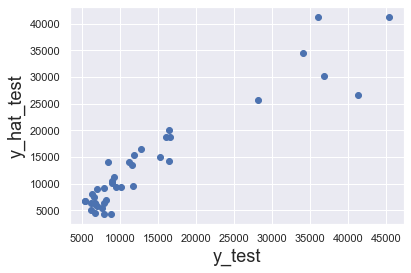

In [63]:
#plotting the y_test and y_hat_test(predicted_train data) to know the accuracy of the prediction
plt.scatter(y_test, y_hat_test)
plt.xlabel('y_test', size=18)
plt.ylabel('y_hat_test', size=18)
plt.show

In [64]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_hat_test)
mse = metrics.mean_squared_error(y_test, y_hat_test)
r2 = metrics.r2_score(y_test, y_hat_test)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 2508.3493499343244
Mean Squared Error (MSE): 12561190.917336546
R-squared (R2): 0.888220681644823


## MODEL_2 - With normalized price

### Now we will scale the data and create a new model on the scaled pice 


##### Finding the distribution of the target variable

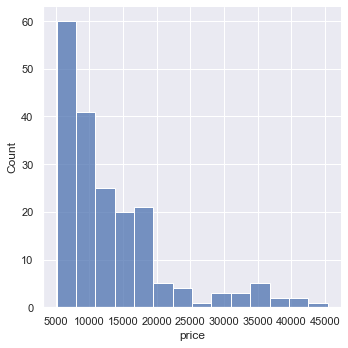

In [65]:
sns.displot(data_optimized["price"])

##### FINDINGS: Data is not normally distributed. Hence, I am taking the log of all the values 

In [66]:
log_price = np.log(data_optimized["price"])
data_optimized["log_price"] = log_price

<ipython-input-66-6e32e4e15b8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_optimized["log_price"] = log_price


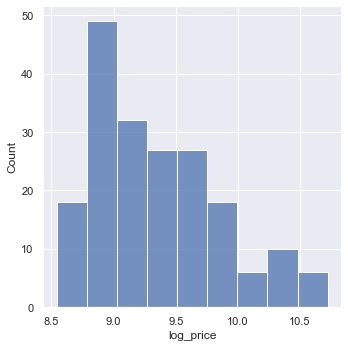

In [67]:
sns.displot(data_optimized["log_price"])

##### Now the price is normally distributed

In [68]:
#I am removing the existing price columns as we have another column with standardised price
data_final1 = data_optimized.drop(["price"], axis=1)
data_final1

,make_encoded,aspiration_encoded,body-style_encoded,drive-wheels_encoded,engine-location_encoded,width,height,engine-size,fuel-system_encoded,stroke,peak-rpm,highway-mpg,log_price
0,0,0,0,2,0,64.1,48.8,130,4,2.68,5000.0,27,9.510075
1,0,0,0,2,0,64.1,48.8,130,4,2.68,5000.0,27,9.711116
2,0,0,2,2,0,65.5,52.4,152,4,3.47,5000.0,26,9.711116
3,1,0,3,1,0,66.2,54.3,109,4,3.40,5500.0,30,9.543235
4,1,0,3,0,0,66.4,54.3,136,4,3.40,5500.0,22,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,20,0,3,2,0,68.9,55.5,141,4,3.15,5400.0,28,9.731809
201,20,1,3,2,0,68.8,55.5,141,4,3.15,5300.0,25,9.854560
202,20,0,3,2,0,68.9,55.5,173,4,2.87,5500.0,23,9.975110
203,20,1,3,2,0,68.9,55.5,145,2,3.40,4800.0,27,10.019936


In [69]:
#Resetting the index as the dataset is still following the index of uncleaned dataset
data_final1 = data_final1.reset_index(drop=True)
data_final1

,make_encoded,aspiration_encoded,body-style_encoded,drive-wheels_encoded,engine-location_encoded,width,height,engine-size,fuel-system_encoded,stroke,peak-rpm,highway-mpg,log_price
0,0,0,0,2,0,64.1,48.8,130,4,2.68,5000.0,27,9.510075
1,0,0,0,2,0,64.1,48.8,130,4,2.68,5000.0,27,9.711116
2,0,0,2,2,0,65.5,52.4,152,4,3.47,5000.0,26,9.711116
3,1,0,3,1,0,66.2,54.3,109,4,3.40,5500.0,30,9.543235
4,1,0,3,0,0,66.4,54.3,136,4,3.40,5500.0,22,9.767095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,20,0,3,2,0,68.9,55.5,141,4,3.15,5400.0,28,9.731809
189,20,1,3,2,0,68.8,55.5,141,4,3.15,5300.0,25,9.854560
190,20,0,3,2,0,68.9,55.5,173,4,2.87,5500.0,23,9.975110
191,20,1,3,2,0,68.9,55.5,145,2,3.40,4800.0,27,10.019936


##### Train_test split (80-20)

In [70]:
from sklearn.model_selection import train_test_split
X = data_final1.drop('log_price', axis=1)
y = data_final1["log_price"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model1 = LinearRegression()

In [73]:
model1.fit(X_train, y_train)

LinearRegression()

In [74]:
y_hat1 = model1.predict(X_train)

In [75]:
# Since we took log price, the results are in log values. We can use exponential to convert them into actual price

In [76]:
model1.score(X_train, y_train)

0.8957249176504445

In [77]:
model1.score(X_test, y_test)

0.9036106670134109

In [78]:
model1.coef_

array([-1.04762362e-02,  1.25747842e-01, -2.30685776e-02,  1.29694083e-01,
        6.50614290e-01,  6.89539021e-02,  2.43247539e-02,  5.01602350e-03,
        5.81072244e-02, -9.55218461e-02,  3.22503914e-05, -3.39660153e-03])

In [79]:
model1.intercept_

2.9422711617911617

In [80]:
def adj_r2(x,y):
    r2 = model1.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [81]:
adj_r2(X_train, y_train)

0.8868504425568653

In [82]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_train, y_hat1)
mse = metrics.mean_squared_error(y_train, y_hat1)
r2 = metrics.r2_score(y_train, y_hat1)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.12272937559366583
Mean Squared Error (MSE): 0.024605573080112294
R-squared (R2): 0.8957249176504445


In [83]:
y_hat1_test = model1.predict(X_test)

In [84]:
y_hat1_test

array([10.79751066,  9.24132467,  9.04438063,  8.83340447,  8.78049692,
        8.95904547, 10.15609599,  8.8853294 , 10.43299526,  9.49579721,
        9.36528348,  8.74036873,  9.91474706, 10.92465994,  9.20362477,
        8.80371238,  8.91485847,  8.8462704 ,  8.75857236,  8.8462704 ,
        9.46162738,  9.18478122, 10.44310881,  9.70129352,  8.8360806 ,
        9.71140405,  8.84026614,  9.4385588 , 10.13476217,  8.76074655,
        9.1409764 ,  9.75637063,  8.86226083,  9.10725853,  9.18331169,
        9.53786735,  9.46162738,  8.76074655,  9.75637063])

In [85]:
actual_price = np.exp(y_hat1_test)
actual_price

array([48898.92359526, 10314.69309102,  8470.8033173 ,  6859.60040792,
        6506.10937099,  7777.92966632, 25747.58183083,  7225.19429463,
       33961.92291543, 13303.69651609, 11675.91534982,  6250.19992143,
       20226.46265608, 55528.95846917,  9933.06892502,  6658.91859319,
        7441.72882093,  6948.42576435,  6365.01811154,  6948.42576435,
       12856.79032246,  9747.64722048, 34307.14121669, 16338.72807747,
        6877.98217624, 16504.7590638 ,  6906.83058659, 12563.59723283,
       25204.10528914,  6378.87196625,  9329.87039977, 17263.86085512,
        7060.42711827,  9020.53147963,  9733.33324536, 13875.32483938,
       12856.79032246,  6378.87196625, 17263.86085512])

In [86]:
mae = metrics.mean_absolute_error(y_test, y_hat1_test)
mse = metrics.mean_squared_error(y_test, y_hat1_test)
r2 = metrics.r2_score(y_test, y_hat1_test)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.1453779917625982
Mean Squared Error (MSE): 0.03403644294713945
R-squared (R2): 0.9036106670134109


## MODEL_3 - Creating model with the scaled dataset

In [87]:
from sklearn.preprocessing import StandardScaler
target = data_final1['log_price']
inputs = data_final1.drop('log_price', axis=1)

In [88]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [89]:
inputs_scaled = scaler.transform(inputs)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=42)

In [91]:
reg1 = LinearRegression()
reg1.fit(X_train,y_train)

LinearRegression()

In [92]:
y_hat2 = reg1.predict(X_train)

In [93]:
y_hat2_test = reg1.predict(X_test)

In [94]:
reg1.score(X_train, y_train)

0.8957249176504443

In [95]:
def adj_r2(x,y):
    r2 = reg1.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
adj_r2(X_train, y_train)

0.8868504425568651

In [96]:
reg1.score(X_test, y_test)

0.9036106670134101

In [97]:
adj_r2(X_test, y_test)

0.8591232825580609

In [98]:
#from sklearn import metrics
# Metrics for Test Set

mae = metrics.mean_absolute_error(y_test, y_hat2_test)
mse = metrics.mean_squared_error(y_test, y_hat2_test)
r2 = metrics.r2_score(y_test, y_hat2_test)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.1453779917626038
Mean Squared Error (MSE): 0.034036442947139735
R-squared (R2): 0.9036106670134101


In [99]:
# Metrics for training Set

mae = metrics.mean_absolute_error(y_train, y_hat2)
mse = metrics.mean_squared_error(y_train, y_hat2)
r2 = metrics.r2_score(y_train, y_hat2)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.12272937559366726
Mean Squared Error (MSE): 0.024605573080112325
R-squared (R2): 0.8957249176504443


## Final result: There is no signficant imporovement in the predictive power of the models after scaling the data. Hence the first model is suffcient for prediction.